### Ch 2: Training Simple ML Algorithms for Classification

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

### Implementing a Peceptron Learning Algorithm in Python

In [104]:
### Make the perceptron class

In [105]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        # Initializes weight vector to be the length of the total # of columns of the X matrix
        # scale = standard deviation; loc = mean
        # --> generating random normal distribution of weights with stdev of .01 and mean of 0
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # Initializes bias to 0
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

- Using perceptron class can now initialize new Perceptron objects with a given learning rate, eta, and the number of epochs, n_iter

- as show below
- if the weights are initialized to zero the learning rate has no impact on the decision boundary
    - the learning rate would only impact the scale of the wegith vector not the direction

In [106]:
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

#### Training a perceptron model on the iris dataset

In [107]:
import os
import pandas as pd

In [108]:
iris_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [109]:
print('From URL:', iris_data)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [110]:
df = pd.read_csv(iris_data, header=None, encoding='utf-8')

In [111]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [112]:
df.rename(columns = {0: 'Sepal Length'
                    , 1: 1
                    , 2: 'Petal Length'
                    , 3: 3
                    , 4: 'Flower Type'}, inplace=True)
df.head()

,Sepal Length,1,Petal Length,3,Flower Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
# select setosa and versicolor flowers
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [114]:
y = np.where(y == 'Iris-setosa', 0, 1)
print(len(y))
print(y)

100
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


- If above throws a "Future Warning" error, here's an explanation: https://stackoverflow.com/questions/40659212/futurewarning-elementwise-comparison-failed-returning-scalar-but-in-the-futur

In [115]:
# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

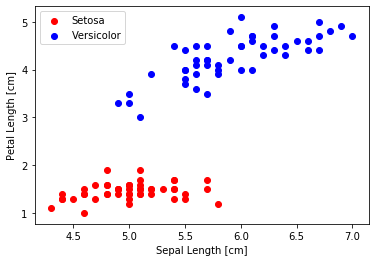

In [116]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='o', label='Versicolor')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

- Perceptron should be able to identify the linear decision boundary and correctly classify the two types of flowers

#### Train on Iris Data and Plot the Misclassification Error

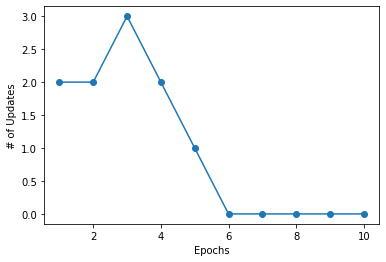

In [117]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('# of Updates')
plt.show()

###### Just seeing what happens when I adjust the learning rate

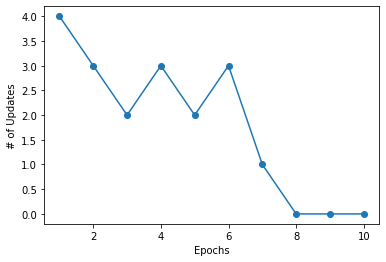

In [118]:
ppn_slow = Perceptron(eta=0.001, n_iter=10)
ppn_slow.fit(X, y)
plt.plot(range(1, len(ppn_slow.errors_) + 1),
         ppn_slow.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('# of Updates')
plt.show()

In [119]:
# ^^^ slower learning rate takes longer to converge to 0 updates

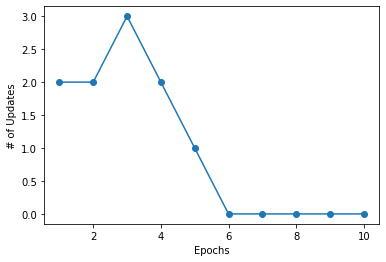

In [120]:
ppn_fast = Perceptron(eta=0.99, n_iter=10)
ppn_fast.fit(X, y)
plt.plot(range(1, len(ppn_fast.errors_) + 1),
         ppn_fast.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('# of Updates')
plt.show()

In [121]:
# ^^^ interesting the even with a much faster learning rate the updates and convergence are the same

- Now model has been trained and should be able to correctly identify flowers

###### Function to visualize the  decision boundaries of 2-d datasets

In [122]:
from matplotlib.colors import ListedColormap

In [123]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    # define colors and markers and create and create a color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    # determine minimum and maximum of the 2 features and use those features vectors to create a
    #... a pair of grid arrays, xx1 and xx2, using the meshgrid function
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # since we trained our perceptron on 2 feature dimensions, need to flatten the grid arrays and create a matrix
    #... that has the same # of columns as the Iris training subset so that we can use the predict method to predict the 
    #... class labels, lab, of each grid point
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class {cl}', edgecolor='black')

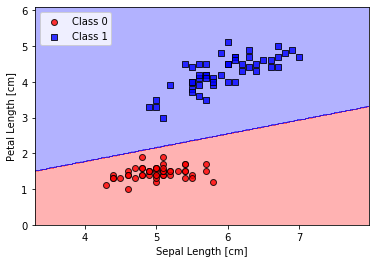

In [124]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

###### Playing around with the above function

In [125]:
i_min, i_max = 3, 5
j_min, j_max = 1, 4
print('i: ', np.arange(i_min, i_max, 0.5))
print('j: ', np.arange(j_min, j_max, 0.5))
ij1, ij2 = np.meshgrid(np.arange(i_min, i_max, 0.5), np.arange(j_min, j_max, 0.5))
print('ij1: ', ij1)
print('ij2: ', ij2)

i:  [3.  3.5 4.  4.5]
j:  [1.  1.5 2.  2.5 3.  3.5]
ij1:  [[3.  3.5 4.  4.5]
 [3.  3.5 4.  4.5]
 [3.  3.5 4.  4.5]
 [3.  3.5 4.  4.5]
 [3.  3.5 4.  4.5]
 [3.  3.5 4.  4.5]]
ij2:  [[1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5]
 [2.  2.  2.  2. ]
 [2.5 2.5 2.5 2.5]
 [3.  3.  3.  3. ]
 [3.5 3.5 3.5 3.5]]


In [126]:
print('ij1.ravel(): ', ij1.ravel())
print('\n')
print('np.array([ij1.ravel(), ij2.ravel()]): ', np.array([ij1.ravel(), ij2.ravel()]))
print('\n')
print('np.array([ij1.ravel(), ij2.ravel()]).T: ', np.array([ij1.ravel(), ij2.ravel()]).T)

ij1.ravel():  [3.  3.5 4.  4.5 3.  3.5 4.  4.5 3.  3.5 4.  4.5 3.  3.5 4.  4.5 3.  3.5
 4.  4.5 3.  3.5 4.  4.5]


np.array([ij1.ravel(), ij2.ravel()]):  [[3.  3.5 4.  4.5 3.  3.5 4.  4.5 3.  3.5 4.  4.5 3.  3.5 4.  4.5 3.  3.5
  4.  4.5 3.  3.5 4.  4.5]
 [1.  1.  1.  1.  1.5 1.5 1.5 1.5 2.  2.  2.  2.  2.5 2.5 2.5 2.5 3.  3.
  3.  3.  3.5 3.5 3.5 3.5]]


np.array([ij1.ravel(), ij2.ravel()]).T:  [[3.  1. ]
 [3.5 1. ]
 [4.  1. ]
 [4.5 1. ]
 [3.  1.5]
 [3.5 1.5]
 [4.  1.5]
 [4.5 1.5]
 [3.  2. ]
 [3.5 2. ]
 [4.  2. ]
 [4.5 2. ]
 [3.  2.5]
 [3.5 2.5]
 [4.  2.5]
 [4.5 2.5]
 [3.  3. ]
 [3.5 3. ]
 [4.  3. ]
 [4.5 3. ]
 [3.  3.5]
 [3.5 3.5]
 [4.  3.5]
 [4.5 3.5]]


### Implementing Adaline in Python

In [127]:
class AdalineGD:
    """ADAptive LINear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch. --> different from perceptron

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        # Initializes weight vector to be the length of the total # of columns of the X matrix
        # scale = standard deviation; loc = mean
        # --> generating random normal distribution of weights with stdev of .01 and mean of 0
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # Initializes bias to 0
        self.b_ = np.float_(0.)
        
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            # instead of updating weights after each training example (as in perceptron), do a batch update
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    # Has no real impact on the code but is implemented to show how information flows through a single-layer NN:
    #... features froms the input data, net input, activation, and output
    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

##### Plot loss against the # of epochs for 2 different learning rates

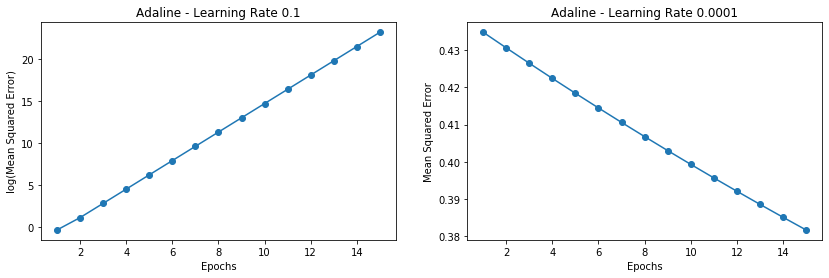

In [128]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot for ada1
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean Squared Error)')
ax[0].set_title('Adaline - Learning Rate 0.1')

# Plot for ada2
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Adaline - Learning Rate 0.0001')

plt.show()

- Takeaways from the above graphs:
    - On the left, the learning rate is too high and we overshot the minimum --> the error is increasing as the # of epochs increases
    - On the right, the learning rate is too low and will take a large # of epochs to reach a minimum

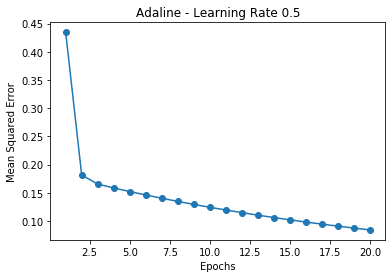

In [208]:
ada3 = AdalineGD(n_iter=20, eta=0.01).fit(X, y)
plt.plot(range(1, len(ada3.losses_) + 1), ada3.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Adaline - Learning Rate 0.5')
plt.show()

In [199]:
X_std = np.copy(X)

In [200]:
X_std[0:10]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

In [201]:
# Normalize the first and send value of each list
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [202]:
X_std[0:10]

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788]])

In [205]:
# train new model using the normalized data
ada_gd = AdalineGD(n_iter=20, eta=0.5).fit(X_std, y)

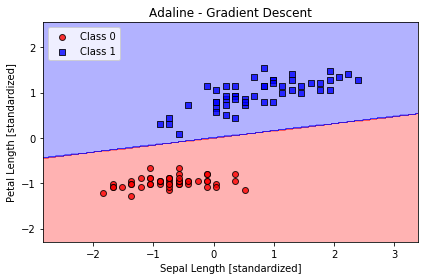

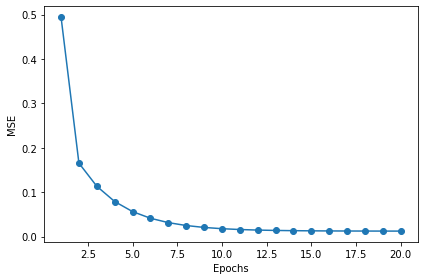

In [204]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

- Able to use a higher learning rate after normalization without exploding/vanishing gradients, I think because outliers are compressed to be within 1 stdev

In [212]:
# Showcasing what the above normalization is doing

X_stdev = X.std()
X0_mean = X[:, 0].mean()
X1_mean = X[:, 1].mean()

print('X_stdev: ', X_stdev)
print('X0_mean: ', X0_mean)
print('X1_mean: ', X1_mean)
print('\n')

X_std_stdev = X_std.std()
X0_std_mean = X_std[:, 0].mean()
X1_std_mean = X_std[:, 1].mean()
print('X_std_stdev: ', X_std_stdev)
print('X0_std_mean: ', X0_std_mean)
print('X1_std_mean: ', X1_std_mean)

X_stdev:  1.7158752139943043
X0_mean:  5.471000000000001
X1_mean:  2.8620000000000005


X_std_stdev:  0.9999999999999998
X0_std_mean:  -1.5182299861749016e-15
X1_std_mean:  -3.8635761256955447e-16


### Implementing Stochastic Gradient Descent

In [215]:
class AdalineSGD:
    """ADAptive LINear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values averaged over all training examples
      in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        
        self._initialize_weights(X.shape[1])
        self.losses_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            # updating weights for each xi
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            # computing avg loss from all xi
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self
    
    # can use the partial_fit for online learning
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                slef._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y)) # generates a random # for each "y"
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        # Initializes weight vector to be the length of the total # of columns of the X matrix
        # scale = standard deviation; loc = mean
        # --> generating random normal distribution of weights with stdev of .01 and mean of 0
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        # Initializes bias to 0.0
        # self.b_ = np.float(0.)
        self.b_ = np.double(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    # Has no real impact on the code but is implemented to show how information flows through a single-layer NN:
    #... features froms the input data, net input, activation, and output
    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [226]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1).fit(X_std, y)

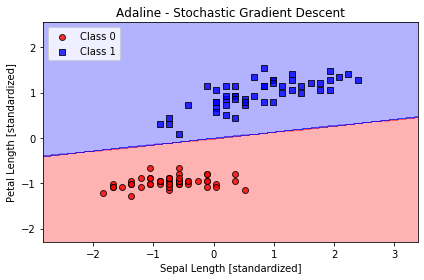

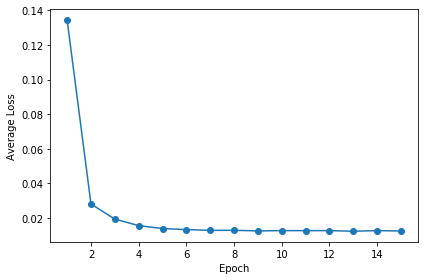

In [227]:
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.tight_layout()
plt.show()

- If wanted to update our model, for example, in an online learning scenario with streaming data, we could call the "partial_fit" methond on individual training examples
    - ex: aga_sgd.partial_fit(X_std[0, :], y[0])

##### Just playing around with the learning rate

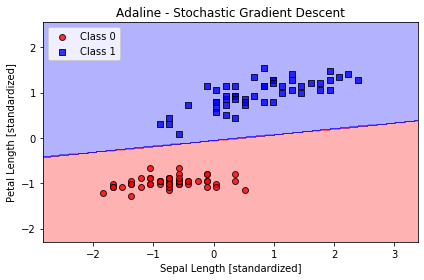

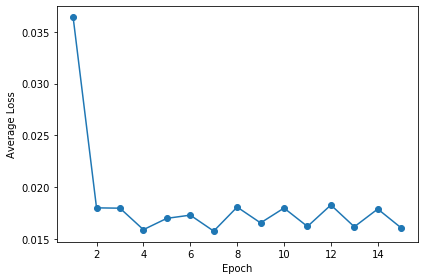

In [230]:
ada_sgd_fast_eta = AdalineSGD(n_iter=15, eta=0.1, random_state=1).fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd_fast_eta)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd_fast_eta.losses_) + 1), ada_sgd_fast_eta.losses_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.tight_layout()
plt.show()

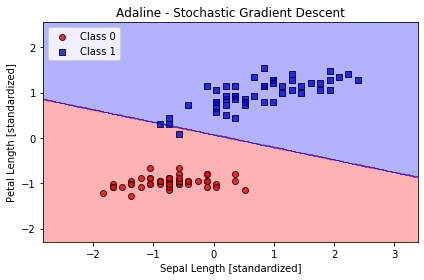

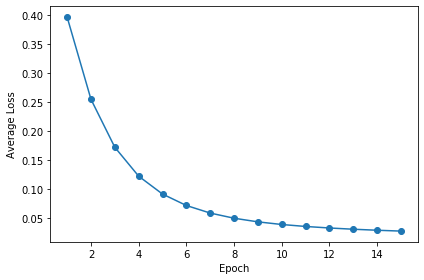

In [231]:
ada_sgd_slow_eta = AdalineSGD(n_iter=15, eta=0.001, random_state=1).fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd_slow_eta)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd_slow_eta.losses_) + 1), ada_sgd_slow_eta.losses_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.tight_layout()
plt.show()